# Nama = `Ahmad Hamdani`
# Nim = `233307092`
# Kelas = `4D`

**Link Dataset:**

https://www.kaggle.com/datasets/kandij/mall-customers

**Studi kasus:**

Segmentasi Pelanggan Mall Berdasarkan Pendapatan Tahunan dan Skor Pengeluaran Menggunakan Algoritma Hierarchical Clustering dengan pendekatan Aglomerative untuk Optimalisasi Strategi Pemasaran

# **1. Import Library**

In [1]:
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik

from scipy.cluster.hierarchy import dendrogram, linkage # Mengimpor
from sklearn.cluster import AgglomerativeClustering   # Mengimpor algoritma Hierarchical Clustering dengan pendekatan Agglomerative
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Data Loading**


In [2]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('data/unsupervised_4_Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **3. Exploratory Data Analysis**

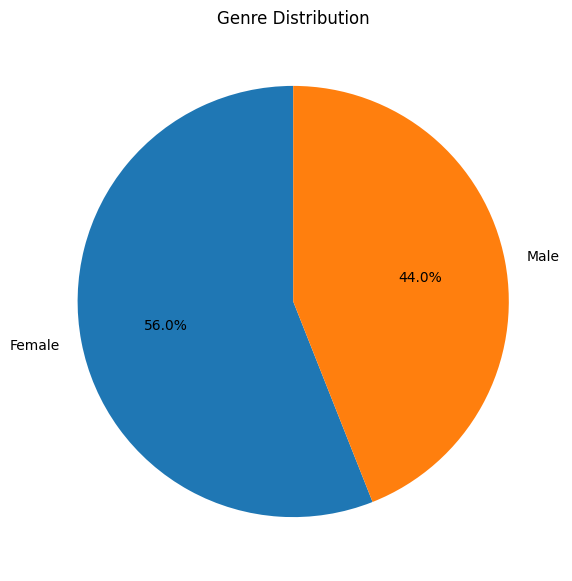

In [5]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Genre'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution')
plt.show()

Program di atas betujuan untuk menghitung distribusi gender dalam dataset dan memvisualisasikannya dalam bentuk diagram lingkaran (pie chart) agar mudah dipahami secara visual.

Dari program tersebut menghasilkan Pie Chart yang menunjukkan distribusi gender dengan 56.0% kategori Female dan 44.0% kategori Male, memberikan gambaran yang jelas tentang proporsi gender dalam data.

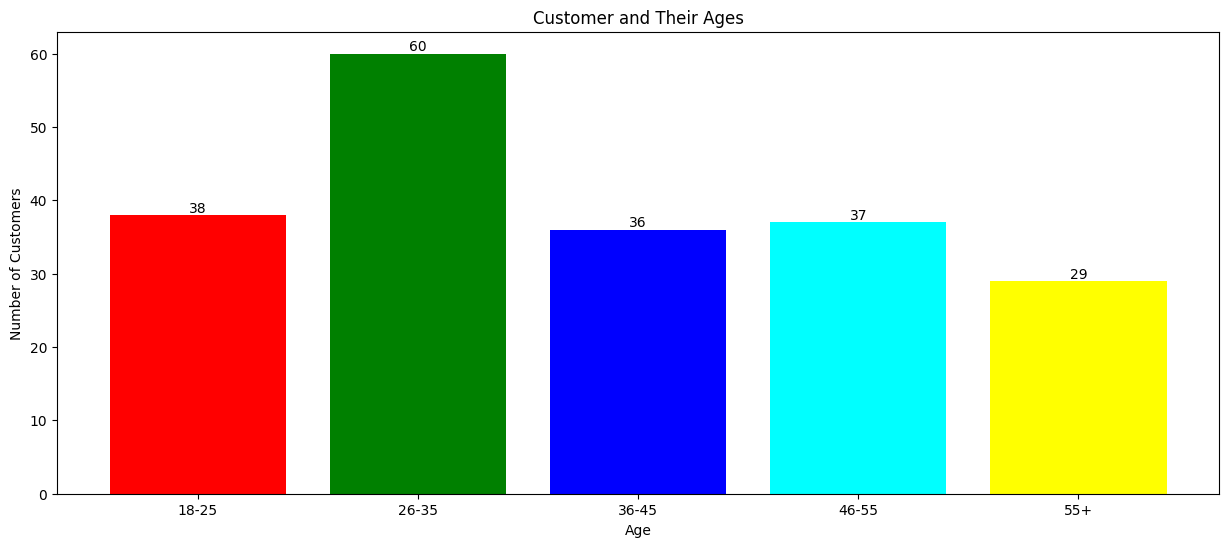

In [6]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Program diatas bertujuan untuk mengelompokkan pelanggan ke dalam kategori usia dan menghitung jumlah pelanggan di setiap kategori, lalu memvisualisasikannya menggunakan bar chart untuk analisis demografi.

Bar chart yang dihasilkan menunjukkan distribusi usia pelanggan dalam kelompok usia, di mana kelompok usia 26-35 memiliki jumlah pelanggan tertinggi (60 orang), sedangkan kelompok usia 55+ memiliki jumlah pelanggan terendah (29 orang).

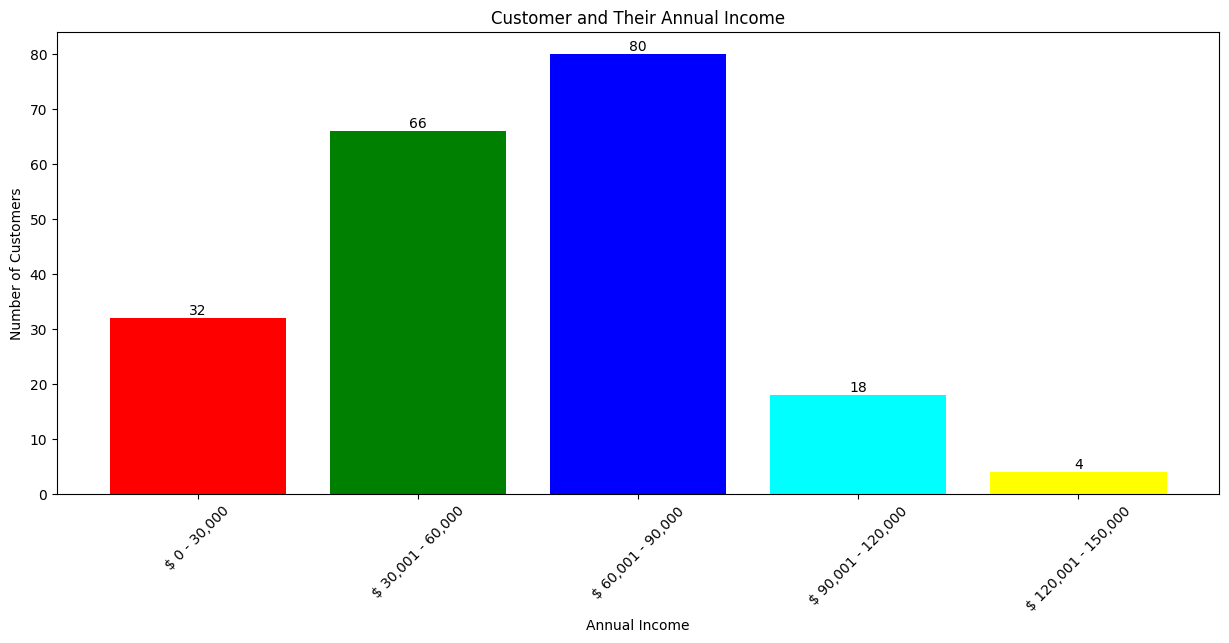

In [7]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Menyusuon data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

Program diatas bertujuan untuk mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori, lalu memvisualisasikannya dalam bentuk bar chart untuk analisis distribusi pendapatan.

Bar chart yang dihasilkan menunjukkan distribusi jumlah pelanggan dalam setiap kategori pendapatan tahunan, dengan pendapatan $60,001-$90,000 memiliki pelanggan terbanyak (80 orang) dan pendapatan $120,001-$150,000 memiliki pelanggan paling sedikit (4 orang).

In [8]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values
X

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Program diatas bertujuan untuk mengambil dua kolom dari dataset, yaitu 'Annual Income (k$)' dan 'Spending Score (1-100)', menyimpannya ke dalam array X, dan menampilkannya dalam format DataFrame dengan nama kolom yang sesuai untuk kemudahan analisis.

Data yang dihasilkan menunjukkan nilai Annual Income (k) dan Spending Score (1-100) dari seluruh 200 entri, yang siap digunakan untuk proses analisis lebih lanjut. Contohnya, pelanggan pertama memiliki pendapatan tahunan 15k dan skor pengeluaran 39.

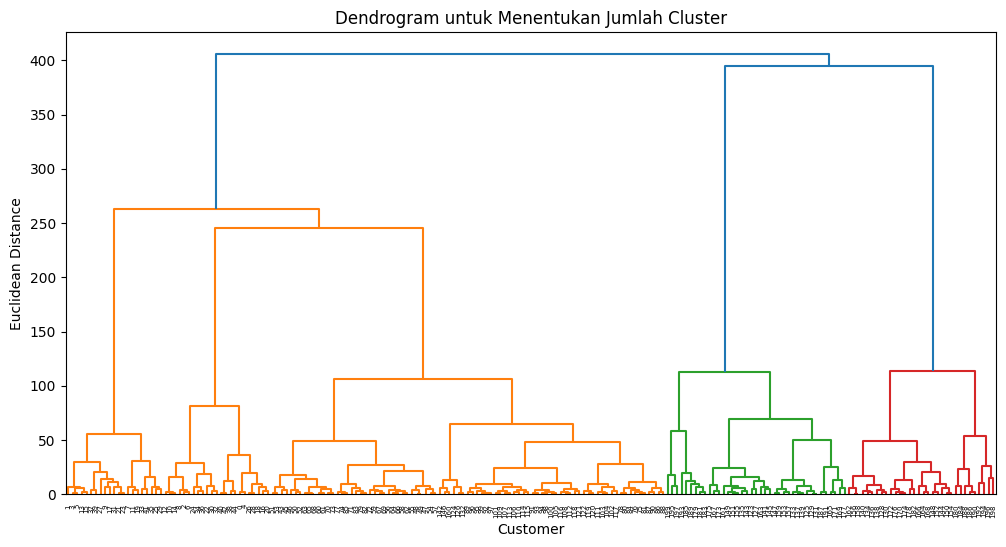

In [9]:
linked = linkage(X, method='ward', metric='euclidean',)

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrogram untuk Menentukan Jumlah Cluster')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

# **4. Pelatihan Model dan Evaluasi**

For n_clusters = 2, the average silhouette_score is : 0.3671
For n_clusters = 3, the average silhouette_score is : 0.4618
For n_clusters = 4, the average silhouette_score is : 0.4917
For n_clusters = 5, the average silhouette_score is : 0.5530
For n_clusters = 6, the average silhouette_score is : 0.5380
For n_clusters = 7, the average silhouette_score is : 0.5199
For n_clusters = 8, the average silhouette_score is : 0.4326
For n_clusters = 9, the average silhouette_score is : 0.4389
For n_clusters = 10, the average silhouette_score is : 0.4343


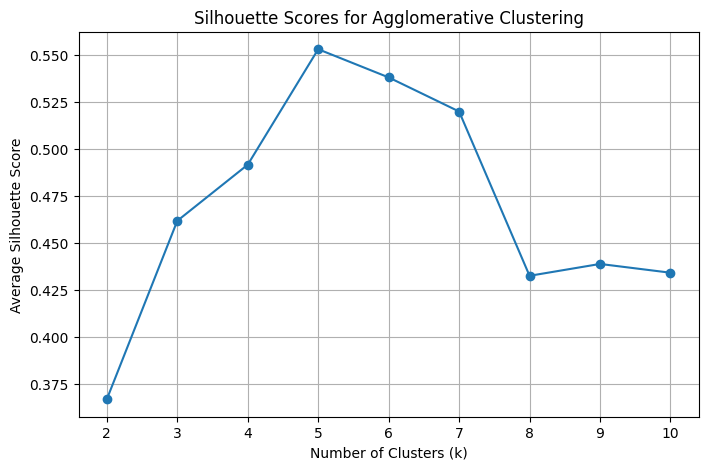

Best number of clusters based on silhouette score: 5


In [10]:
range_n_clusters = range(2, 11)  # kita cek dari 2 sampai 10 cluster
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='euclidean',
        linkage='ward'
    )
    cluster_labels = clustering.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

# --- Plot Silhouette Score vs Jumlah Cluster ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Scores for Agglomerative Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

# --- Cari nilai n_clusters terbaik berdasarkan score tertinggi ---
best_n_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"Best number of clusters based on silhouette score: {best_n_clusters}")

Program tersebut bertujuan untuk mengevaluasi performa pengelompokan menggunakan Agglomerative Clustering dengan berbagai jumlah klaster (2-10) dan menentukan jumlah klaster optimal berdasarkan skor silhouette tertinggi.

Evaluasi menghasilkan bahwa jumlah klaster terbaik adalah 5, dengan skor silhouette rata-rata tertinggi sebesar **0.5530**, menunjukkan kualitas klasterisasi yang paling optimal pada konfigurasi ini.

In [11]:
# --- Fit model final berdasarkan best_n_clusters ---
final_model = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    metric='euclidean',
    linkage='ward'
)
final_labels = final_model.fit_predict(X)

# --- Fungsi analisis karakteristik tiap cluster ---
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Ambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Hitung rata-rata fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # kolom 0 = Annual Income
        mean_spending = cluster_data[:, 1].mean()  # kolom 1 = Spending Score

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")

# --- Analisis hasil clustering ---
analyze_clusters(X, final_labels, best_n_clusters)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): 89.41
Rata-rata Spending Score (1-100): 15.59

Cluster 2:
Rata-rata Annual Income (k$): 55.81
Rata-rata Spending Score (1-100): 49.13

Cluster 3:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 4:
Rata-rata Annual Income (k$): 25.10
Rata-rata Spending Score (1-100): 80.05

Cluster 5:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


Program ini bertujuan untuk menerapkan Agglomerative Clustering pada dataset untuk analisis segmentasi, serta mempelajari karakteristik rata-rata pendapatan dan skor pengeluaran di masing-masing cluster.

Analisis menghasilkan 5 cluster dengan karakteristik rata-rata, seperti cluster 1 yang memiliki pendapatan rata-rata 89.41k$ dan skor pengeluaran 15.59, menunjukkan perbedaan segmen pelanggan berdasarkan perilaku dan demografi.

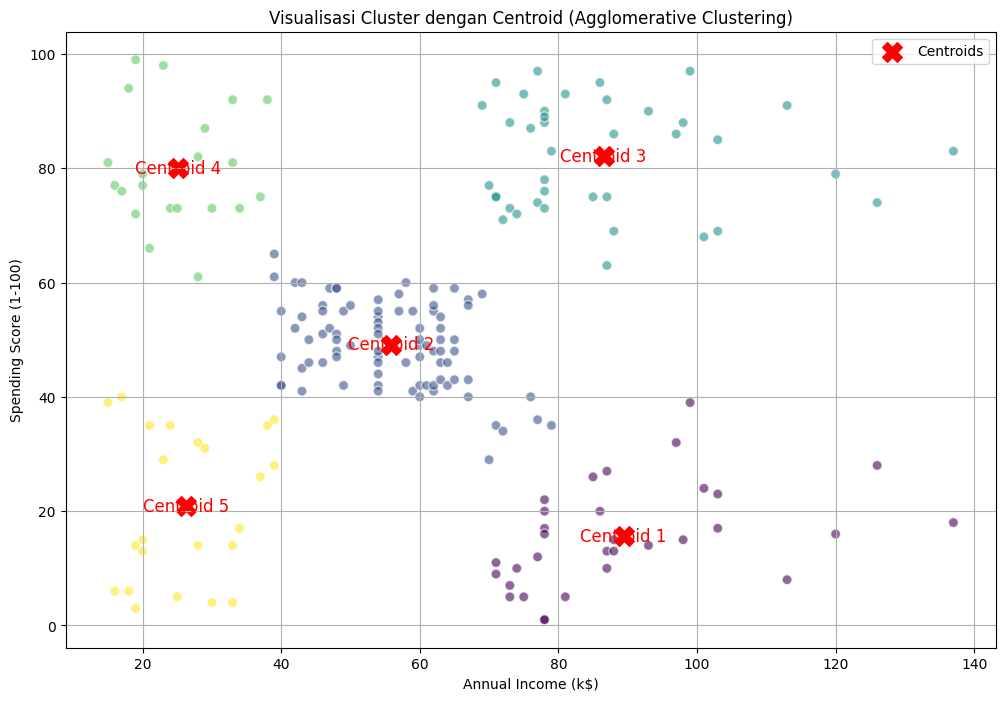

Nilai Centroids:
Centroid 1: Annual Income = 89.41, Spending Score = 15.59
Centroid 2: Annual Income = 55.81, Spending Score = 49.13
Centroid 3: Annual Income = 86.54, Spending Score = 82.13
Centroid 4: Annual Income = 25.10, Spending Score = 80.05
Centroid 5: Annual Income = 26.30, Spending Score = 20.91


In [12]:
centroids = []
for cluster_id in range(best_n_clusters):
    cluster_points = X[final_labels == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label pada masing-masing centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.grid(True)
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Kode program di atas digunakan untuk menghitung centroid dari cluster hasil Agglomerative Clustering, memvisualisasikan data dengan scatter plot yang menunjukkan cluster, serta menampilkan nilai centroid pada grafik dan dalam bentuk teks.

Grafik menampilkan cluster data yang dikelompokkan berdasarkan pendapatan tahunan dan skor pengeluaran, dengan centroids yang ditandai dan diberi label, serta nilai centroids dicetak dalam teks.

In [13]:
# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X, final_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5530


Kode ini menghitung Silhouette Score, yang mengukur seberapa baik data dikelompokkan dalam cluster berdasarkan kesamaan internal dibandingkan dengan perbedaan antar-cluster.

Silhouette Score sebesar 0.5530 menunjukkan bahwa cluster memiliki kualitas pemisahan yang cukup baik, dengan struktur cluster yang cukup jelas.

# **5. Hasil dan Interpretasi:**

Berdasarkan analisis, pelanggan mall dapat dikelompokkan menjadi beberapa segmen yang berbeda. Berikut interpretasinya:

1. **Cluster 1: "Low Spenders"**  
   Pelanggan dengan pendapatan tinggi tetapi skor belanja rendah.  
   Segmen ini mungkin lebih berhati-hati dalam pengeluaran dan dapat ditingkatkan loyalitasnya dengan promosi atau insentif yang menarik.

2. **Cluster 2: "Balanced Spenders"**  
   Pelanggan dengan pendapatan menengah dan skor belanja menengah.  
   Segmen ini merupakan kelompok yang paling representatif dan dapat menjadi fokus strategi pemasaran yang efektif dan menyeluruh.

3. **Cluster 3: "Luxury Shoppers"**  
   Pelanggan dengan pendapatan tinggi serta skor belanja tinggi.  
   Segmen ini sangat bernilai untuk mall dan layak mendapatkan perlakuan eksklusif, seperti program VIP dan layanan personal.

4. **Cluster 4: "Budget-Conscious Enthusiasts"**  
   Pelanggan dengan pendapatan rendah tetapi skor belanja tinggi.  
   Segmen ini mungkin terdiri dari pelanggan yang mencari tren atau nilai terbaik, cocok untuk promosi kreatif atau produk dengan harga menarik.

5. **Cluster 5: "Frugal Customers"**  
   Pelanggan dengan pendapatan rendah dan skor belanja rendah.  
   Segmen ini cenderung berorientasi pada diskon dan mungkin memerlukan strategi pemasaran berbasis kupon atau bundling.

Segmen-segmen ini memberikan wawasan untuk mengarahkan strategi pemasaran dan pengelolaan hubungan pelanggan agar sesuai dengan kebutuhan unik setiap kelompok. Dengan demikian, mall dapat meningkatkan pengalaman belanja dan loyalitas pelanggan secara lebih efektif.